
<img src="https://www.ccsf.edu/sites/default/files/inline-images/CCSF%20LOGO.png" width = 20%>

<br><br><br>

# Creating Playlists using  k-NN Classification
Students - Olga Aronov and Lil Cabrera <br> Faculty Mentor - Shawn Wiggins


## Notebook Setup

In [1]:
from datascience import *
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots

## The Data 

* Data Source - [Top Spotify songs from 2010-2019 - BY YEAR
 by Leonardo Henrique](https://www.kaggle.com/leonardopena/top-spotify-songs-from-20102019-by-year?select=top10s.csv)
* Definitions of Song Features  - [Spotify Track Features](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features)

In [2]:
songs = Table().read_table('https://raw.githubusercontent.com/ccsf-math-108/data/main/songs.csv')
songs

title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,playlist
"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83,triangle
Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82,triangle
TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80,triangle
Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79,triangle
Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78,square
Baby,Justin Bieber,canadian pop,2010,65,86,73,-5,11,54,214,4,14,77,triangle
Dynamite,Taio Cruz,dance pop,2010,120,78,75,-4,4,82,203,0,9,77,triangle
Secrets,OneRepublic,dance pop,2010,148,76,52,-6,12,38,225,7,4,77,square
Empire State of Mind (Part II) Broken Down,Alicia Keys,hip pop,2010,93,37,48,-8,12,14,216,74,3,76,square
Only Girl (In The World),Rihanna,barbadian pop,2010,126,72,79,-4,7,61,235,13,4,73,triangle


## Feature Selection

#### Not so Helpful Features

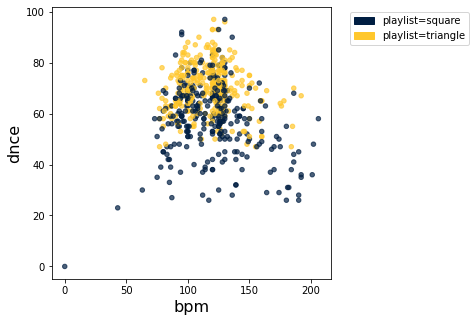

In [3]:
songs.scatter('bpm', 'dnce', group='playlist')

#### Helpful Features

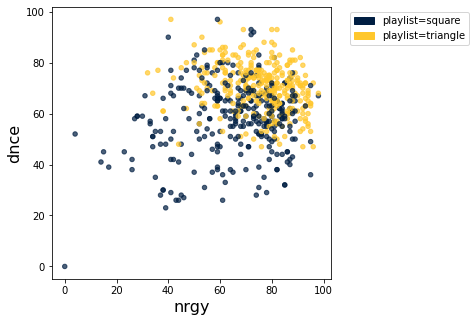

In [4]:
songs.scatter('nrgy', 'dnce', group='playlist')

In [5]:
features = make_array('nrgy', 'dnce')

## Creating Training and Testing Sets

In [6]:
training_proportion = 0.7
shuffled_songs = songs.sample(with_replacement=False)
num_songs = shuffled_songs.num_rows
training_songs = shuffled_songs.take(np.arange(round(training_proportion * num_songs)))
testing_songs = shuffled_songs.take(np.arange(round(training_proportion * num_songs), num_songs))

## Building the Classifier

### Defining Distance

* A song $s$ is reprsented as $(x, y)$ where $x$ is the energy value and $y$ is the danceability value for the song.
* The distance between two songs $s_1, s_2$ is defined by the Euclidean distance formula: $$d(s_1, s_2) ::= \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}$$

In [7]:
def song_distance(song1, song2):
  '''Distance between two song with an array of numerical properties'''
  return np.sqrt(np.sum((song1 - song2) ** 2))

### Convert a row into an arrays

In [8]:
def row_to_array(row, features):
  '''row.item(feature) takes a feature item from row then appends to the array'''
  arr = make_array()
  for feature in features:
      arr = np.append(arr, row.item(feature))
  return arr

### The 5-NN Classifier

In [9]:
def classify(song):
  '''This algorithm labels an inputed song by using the majority
  label of the 5 nearest songs in a training_song table based on a features array.'''

  k = 5 # number of nearest neighbors (songs)
  label = 'playlist'

  test_song_features_array = row_to_array(song, features)

  distances = make_array()

  for training_song in training_songs.rows:
      training_song_features_array = row_to_array(training_song, features)
      distance = song_distance(test_song_features_array, training_song_features_array)
      distances = np.append(distances, distance)

  training_songs_with_distances = training_songs.with_columns('distances', distances)
  nearest_neighbors = training_songs_with_distances.sort('distances').take(np.arange(k))
  majority_label = nearest_neighbors.group(label).sort('count', descending=True).column(label).item(0)

  return majority_label

### Accuracy

In [10]:
testing_songs_with_predictions = testing_songs.with_column('prediction', testing_songs.apply(classify))
testing_songs_with_predictions

title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,playlist,prediction
It Will Rain,Bruno Mars,pop,2012,150,84,58,-7,8,48,258,34,5,38,square,square
Like A G6,Far East Movement,dance pop,2010,125,84,44,-8,12,78,217,1,45,72,square,square
No Vacancy (with Sebasti·n Yatra),OneRepublic,dance pop,2017,100,76,69,-4,14,59,223,8,4,57,triangle,triangle
Dear Future Husband,Meghan Trainor,dance pop,2015,79,78,66,-5,32,83,184,38,19,72,triangle,square
Company,Justin Bieber,canadian pop,2015,95,80,59,-5,8,43,208,13,6,72,square,square
The Time (Dirty Bit),The Black Eyed Peas,dance pop,2010,128,81,82,-8,60,44,308,7,7,70,square,triangle
"How Far I'll Go - From ""Moana""",Alessia Cara,canadian contemporary r&b,2017,181,54,31,-10,7,16,176,16,35,71,square,square
Dangerous,Jennifer Hudson,dance pop,2015,109,53,90,-5,8,65,255,0,5,18,triangle,triangle
Dynamite,Taio Cruz,dance pop,2010,120,78,75,-4,4,82,203,0,9,77,triangle,triangle
IDGAF,Dua Lipa,dance pop,2018,97,54,84,-6,8,51,218,4,9,84,triangle,triangle


In [11]:
num_correct = np.count_nonzero(testing_songs_with_predictions.column('playlist') \
                               == testing_songs_with_predictions.column('prediction'))
accuracy = num_correct / testing_songs.num_rows
accuracy

0.6795580110497238

### Classifying New Songs

#### Smile - Katy Perry

'triangle'

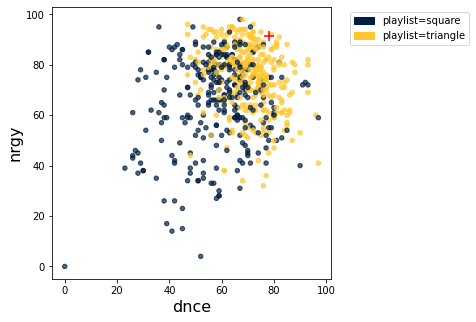

In [12]:
smile = Table().with_columns('nrgy', make_array(91.2), 'dnce', make_array(78.3)).row(0)
songs.scatter('dnce', 'nrgy',  group='playlist')
plots.scatter(78.3, 91.2, c = 'red', marker='+', s=100)
classify(smile)

#### Put on a Smile - Silk Sonic

'square'

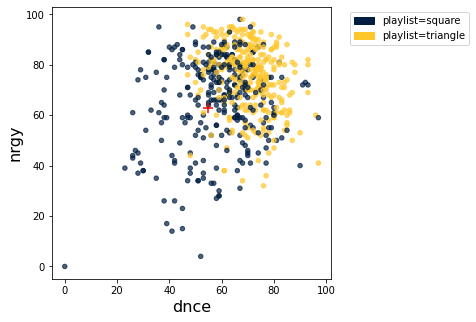

In [14]:
put_on_a_smile = Table().with_columns('nrgy', make_array(62.7), 'dnce', make_array(54.8)).row(0)
songs.scatter('dnce', 'nrgy',  group='playlist')
plots.scatter(54.8, 62.7, c = 'red', marker='+', s=100)
classify(put_on_a_smile)